# Elementy Inteligencji Obliczeniowej - Sieci Neuronowe


---

**Prowadzący:** Jakub Bednarek<br>
**Kontakt:** jakub.bednarek@put.poznan.pl<br>
**Materiały:** [Strona WWW](http://jakub.bednarek.pracownik.put.poznan.pl)

---

## Uwaga

* **Aby wykonać polecenia należy najpierw przejść do trybu 'playground'. File -> Open in Playground Mode**
* Nowe funkcje Colab pozwalają na autouzupełnianie oraz czytanie dokumentacji

## Cel ćwiczeń: 

* zapoznanie się z pojęciem **zbioru danych** i jego charakterystyką,
* wykorzystanie podstawowych warstw neuronowych,
* implementacja procesu uczenia sieci neuronowej + *good practices*

In [1]:
import tensorflow as tf
import numpy as np

## Zbiór danych

### Wprowadzenie oraz popularne zbiory danych

Odpowiednie przygotowanie zbioru danych odgrywa znaczącą rolę w uczeniu sieci neuronowych. Zazwyczaj zbiory danych zawierają 3 pozbiory:

* treningowy - wykorzystywany do uaktualniania wag modelu neuronowego,
* walidacyjny - do oceny modelu po każdej **epoce**,
* testowy - do porównania modelu z innymi rozwiązaniami.

**Uwaga:** bardzo często popularne zbiory danych nie posiadają zbioru testowego, ponieważ nie prowadzą tzw. **leaderboard**.

Najpopularniejsze zbiory danych:

* **MNIST**,
* eMNIST,
* Caltech 101/256,
* Cityscapes,
* Kitty,
* LFW Face Dataset,
* ImageNet

Więcej informacji: [wiki](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research) [kaggle](https://www.kaggle.com/datasets) [google](https://toolbox.google.com/datasetsearch)

### Obsługa zbioru danych w TensorFlow

Biblioteka TensorFlow zawiera API dedykowane obsłudze zbiorów danych. API zawiera takie funkcje jak wczytywanie danych, grupowanie, filtrowanie, mapowanie, tasowanie, iterowanie i wiele innych. Pełne informacje na temat Dataset API: [link](https://www.tensorflow.org/guide/data).

#### Tworzenie zbioru danych

In [2]:
dataset_size = 10

# zbiór danych składający się z losowych obrazków o rozmiarze (32, 32, 3) oraz etykiet po kolei od 0 do dataset_size
x = [np.random.uniform(size=(32, 32, 3)) for _ in range(dataset_size)]
y = [i for i in range(dataset_size)]

# utworzenie "iteratora" zbioru danych
dataset = tf.data.Dataset.from_tensor_slices((x, y))

#### Iterowanie po zbiorze danych

In [3]:
for x, y in dataset:
  print(x.shape, y)

(32, 32, 3) tf.Tensor(0, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(1, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(2, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(3, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(4, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(5, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(6, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(7, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(8, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(9, shape=(), dtype=int32)


#### Tasowanie

In [4]:
dataset_shuffled = dataset.shuffle(dataset_size)

for x, y in dataset_shuffled:
  print(x.shape, y)

(32, 32, 3) tf.Tensor(5, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(6, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(0, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(7, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(3, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(2, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(4, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(9, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(8, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(1, shape=(), dtype=int32)


#### Mapowanie

In [5]:
def map(x, y):
  y = y * 2
  return x, y

dataset_mapped = dataset.map(map)

for x, y in dataset_mapped:
  print(x.shape, y)

(32, 32, 3) tf.Tensor(0, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(2, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(4, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(6, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(8, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(10, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(12, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(14, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(16, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(18, shape=(), dtype=int32)


#### Filtrowanie

In [6]:
def _filter(x, y):
  return y < 5

dataset_filtered = dataset.filter(_filter)

for x, y in dataset_filtered:
  print(x.shape, y)

(32, 32, 3) tf.Tensor(0, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(1, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(2, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(3, shape=(), dtype=int32)
(32, 32, 3) tf.Tensor(4, shape=(), dtype=int32)


#### Grupowanie

In [7]:
dataset_batch = dataset.batch(5)

for x, y in dataset_batch:
  print(x.shape, y)

(5, 32, 32, 3) tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int32)
(5, 32, 32, 3) tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int32)


#### Składanie wielu operacji na raz

In [8]:
def _filter(x, y):
  return y % 2 == 0

def _map(x, y):
  x = tf.cast(x * 255.0, tf.int32)
  return x, y

batch_size = 2

dataset_mix = dataset \
  .filter(_filter) \
  .shuffle(dataset_size) \
  ._map(_map) \
  .batch(batch_size)

for x, y in dataset_mix:
  print(x[0, 0, 0, 0], x.shape, y)

tf.Tensor(197, shape=(), dtype=int32) (2, 32, 32, 3) tf.Tensor([2 4], shape=(2,), dtype=int32)
tf.Tensor(93, shape=(), dtype=int32) (2, 32, 32, 3) tf.Tensor([6 8], shape=(2,), dtype=int32)
tf.Tensor(50, shape=(), dtype=int32) (1, 32, 32, 3) tf.Tensor([0], shape=(1,), dtype=int32)


#### Zadanie 1

Stwórz zbiór danych (bez podziału na zbiory treningowe, walidacyjne i treningowe) składający się z 10000 elementów, zawierający pary (x, y) danych dla funkcji **sinus**. Dane x niech będą z zakresu [-2 * PI, 2 * PI], y - odpowiadające im wartości funkcji sinus.

Następnie utwórz providera za pomocą TensorFlow Dataset API, który będzie:

* tasował dane (buffer size = dataset size)
* mapował tak, aby dane x, z zakresu [-2 \* PI, 0), były transformowane do przedziału [0, 2 \* PI) 

Podpowiedź: (x + 2PI) % 2PI,
* grupował dane w batche o rozmiarze 32

In [15]:
dataset_size = 10000

x = np.linspace(-2 * np.pi, 2 * np.pi, dataset_size)
y = np.sin(x)

dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset \
  .shuffle(dataset_size) \
  .map(lambda x, y: ((x + 2 * np.pi) % (2 * np.pi), y)) \
  .batch(32)

for x, y in dataset:
  print(x, y)
  break

tf.Tensor(
[0.74714545 5.956427   1.19832327 1.85058313 0.03581774 0.88538935
 5.79241946 1.0757889  0.93503148 4.85424607 0.39839379 6.17384695
 5.46628953 2.68507359 2.56819465 4.54571082 0.29282572 1.72930553
 4.73171171 0.40719113 4.74804962 5.18791658 0.79050376 4.83476625
 5.02516581 2.42366694 0.31481907 0.27900133 0.41661685 1.84555608
 3.62136183 5.90929839], shape=(32,), dtype=float64) tf.Tensor(
[ 0.67954734 -0.32097456  0.9314302   0.96111433  0.03581008  0.7741615
 -0.47130148  0.87996518  0.80461777 -0.98995514  0.38793842 -0.10912063
 -0.72902455  0.44082632  0.54248971 -0.98614133  0.28865881  0.9874637
 -0.99981332  0.39603168 -0.99936423 -0.88905131  0.71070775 -0.99252124
 -0.9514828   0.65782379  0.30964443  0.27539573  0.40466901  0.96249041
 -0.46157442 -0.36523657], shape=(32,), dtype=float64)


### Popularne zbiory danych

Biblioteka TensorFlow zawiera gotowe funkcje wczytujące dla niektórych zbiorów danych. W TensorFlow w wersji 2.0 zdecydowano się przenieść większość providerów dla zbiorów danych do osobnej "mini biblioteki" - tensorflow_datasets. Poniżej została wypisana lista dostępnych zbiorów danych w paczce tensorflow_datasets.

In [16]:
import tensorflow_datasets as tfds

print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'beir', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'bucc', 'c4', 'c4_wsrs', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar100_n', 'cifar10_1', 'cifar10_corrupted', 'cifar10_n', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'conll2002', 'conll2003', 'controlled_noisy_web_labels', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d

Jednym z popularniejszych zbiorów danych jest MNIST. Jest to zbiór zawierający cyfry pochodzące z pisma odręcznego wraz z ich przypisanymi etykietami ('1', '2', etc.). Poniżej przykładowe pobranie i wykorzystanie zbioru MNIST.

**Uwaga:** metoda prefetch() służy do wcześniejszego wczytania danych w celu oszczędności czasu. Metoda take(k) pobiera k pierwszych elementów ze zbioru danych (również tworząc nowy provider, jak każda metoda z Dataset API).

In [17]:
import IPython.display
import PIL.Image

dataset = tfds.load(name="mnist", split=tfds.Split.TRAIN)

dataset = dataset \
  .shuffle(1024) \
  .batch(32) \
  .prefetch(tf.data.experimental.AUTOTUNE)

for features in dataset.take(1):
  image, label = features["image"], features["label"]
  for i in range(10):
    IPython.display.display(PIL.Image.fromarray(image[i, :, :, 0].numpy()))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\HououinKyouma\tensorflow_datasets\mnist\3.0.1.incomplete0CNVNE\mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\HououinKyouma\tensorflow_datasets\mnist\3.0.1.incomplete0CNVNE\mnist-test.tfrecord*...:   0…

Dataset mnist downloaded and prepared to C:\Users\HououinKyouma\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


**Cifar 10**

In [18]:
import IPython.display
import PIL.Image

dataset = tfds.load(name="cifar10", split=tfds.Split.TRAIN)

dataset = dataset \
  .shuffle(1024) \
  .batch(32) \
  .prefetch(tf.data.experimental.AUTOTUNE)

for features in dataset.take(1):
  image, label = features["image"], features["label"]
  for i in range(10):
    IPython.dismnistplay.display(PIL.Image.fromarray(image[i, :, :, 0].numpy()))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\HououinKyouma\tensorflow_datasets\cifar10\3.0.2.incompleteN3ZY8M\cifar10-train.tfrecord*...…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\HououinKyouma\tensorflow_datasets\cifar10\3.0.2.incompleteN3ZY8M\cifar10-test.tfrecord*...:…

Dataset cifar10 downloaded and prepared to C:\Users\HououinKyouma\tensorflow_datasets\cifar10\3.0.2. Subsequent calls will reuse this data.


AttributeError: module 'IPython' has no attribute 'dismnistplay'

**Cifar 101**

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\HououinKyouma\tensorflow_datasets\cifar100\3.0.2.incomplete5JWGAI\cifar100-train.tfrecord*.…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\HououinKyouma\tensorflow_datasets\cifar100\3.0.2.incomplete5JWGAI\cifar100-test.tfrecord*..…

Dataset cifar100 downloaded and prepared to C:\Users\HououinKyouma\tensorflow_datasets\cifar100\3.0.2. Subsequent calls will reuse this data.


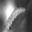

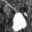

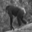

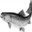

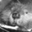

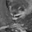

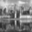

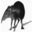

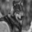

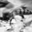

In [19]:
import IPython.display
import PIL.Image

dataset = tfds.load(name="cifar100", split=tfds.Split.TRAIN)

dataset = dataset \
  .shuffle(1024) \
  .batch(32) \
  .prefetch(tf.data.experimental.AUTOTUNE)

for features in dataset.take(1):
  image, label = features["image"], features["label"]
  for i in range(10):
    IPython.display.display(PIL.Image.fromarray(image[i, :, :, 0].numpy()))

**Cats vs Dogs**

In [ ]:
import IPython.display
import PIL.Image

dataset = tfds.load(name="cats_vs_dogs", split=tfds.Split.TRAIN)

dataset = dataset \
  .prefetch(tf.data.experimental.AUTOTUNE)

for features in dataset.skip(1).take(1):
  image, label = features["image"], features["label"]
  print(label.numpy())
  IPython.display.display(PIL.Image.fromarray(image.numpy()))

## Podstawowe warstwy neuronowe

Przy projektowaniu sieci neuronowych możemy wyróżnić podstawowe operacje (warstwy), które się powtarzają. Dla wygody, TensorFlow zawiera gotowe implementacje najprostszych z nich, oraz udostępnia interfejsy do tworzenia własnych, bardziej skomplikowanych. 

Operacje możemy podzielić na:
* **uczalne** - zawierające zmienne uczalne (np. *w* i *b* w warstwie w pełni połączonej),
* **nieuczalne** - takie, które wykonują pewne charakterystyczne działania na danych, jednak nie potrzebują do tego zmiennych, które będą uczone w trakcie propagacji gradientu.

Poniżej zaprezentowane zostały popularne operacje uczalne i nieuczalne.

**Uwaga**
Wszystkie operacje są reprezentowane jako klasy.

### Uczalne



Dzięki predefiniowanym warstwom nie ma potrzeby samodzielnej deklaracji nowych zmiennych. Wszystkie zmienne uczone są deklarowane (zgodnie z implementacją danej warstwy) wewnątrz obiektu, a następnie przechowywane.

**Uwaga**
Zmienne są deklarowane dopiero w momencie pierwszego wywołania funkcji. Możliwa jest również "budowa" danej warstwy wykorzystując metodę *build*.

Do zmiennych uczonych można dostać się poprzez własność *trainable_weights* (lub *trainable_variables*). Bez wcześniejszego wywołania metody *build* lista *trainable_weights* będzie pusta.

In [20]:
m = tf.keras.layers.Dense(5)
m.build([None, 10])

print(m.trainable_weights)


[<tf.Variable 'kernel:0' shape=(10, 5) dtype=float32, numpy=
array([[ 0.09238988,  0.12018889, -0.2137483 , -0.00510347, -0.06358343],
       [ 0.5749679 ,  0.48570436,  0.5539014 , -0.41942152, -0.12842834],
       [ 0.39873058,  0.36024797,  0.20640892, -0.53717697, -0.5939462 ],
       [ 0.5303727 ,  0.19107306, -0.49522686, -0.01907498, -0.55135375],
       [-0.14226186, -0.60396826, -0.44277635, -0.4707067 , -0.05722898],
       [ 0.24571335, -0.37990028,  0.24562043, -0.36828348, -0.38057777],
       [-0.00371063,  0.4983036 , -0.55402   , -0.21541646, -0.46202052],
       [-0.44420704, -0.07294261, -0.3045499 , -0.16986081, -0.28610718],
       [-0.3342166 ,  0.08104253,  0.1329847 , -0.56870294,  0.00389427],
       [-0.22964975,  0.01554096, -0.5890308 ,  0.32818413, -0.06452417]],
      dtype=float32)>, <tf.Variable 'bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>]


#### Dense

Jest to warstwa w pełni połączona, która pobiera jako wejście wektor i produkuje na wyjściu wektor o długości równej rozmiarowi warstwy (liczby neuronów). 

Dodatkowo, można określić która funkcja aktywacji ma zostać wykorzystana. Domyślnie, Dense nie korzysta z żadnej funkcji aktywacji, a więc jest to kombinacja liniowa.

In [21]:
# definicja warstwy
dense1 = tf.keras.layers.Dense(8, 'relu')

# inferencja (przy pierwszym wywołaniu warstwy dense1 zostaną stworzone zmienne uczone)
x = tf.ones([10, 4])
y = dense1(x)

# rozmiar wejściowego oraz wyjściowego tensora
print(y.shape, x.shape)

# zmienne uczone
for v in dense1.trainable_variables:
  print(v.name, v.shape)

(10, 8) (10, 4)
dense_1/kernel:0 (4, 8)
dense_1/bias:0 (8,)


#### Convolution

Warstwa w pełni połączona dobrze sprawdza się przy danych jednowymiarowych. W przypadku danych wielowymiarowych (jak obrazy) korzystanie z nich byłoby bardzo kosztowne obliczeniowo. Aby wykonać pojedynczą operację *Dense* z 128 neuronami na obrazie o rozmiarach (256, 256, 3) należałoby zadeklarować  256 * 256 * 3 * 128 = 25165824 zmiennych uczonych.

Popularnym rozwiązaniem efektywnego przetwarzania danych wielowymiarowych są operacje konwolucji ([link do wizualizacji](https://github.com/vdumoulin/conv_arithmetic)). Konwolucja (inaczej splot) w sieciach neuronowych intuicyjnie jest, tak samo jak *Dense*, kombinacją liniową danego podobszaru danych wielowymiarowych i zmiennych uczonych (inaczej *kernel*).

Konwolucja w Tensorflow posiada szereg parametrów takich jak:
* liczba filtrów - czyli ile razy dla danego podobszaru wykonamy kombinacji liniowych z różnymi (!) zmiennymi uczonymi,
* rozmiar kernela - czyli rozmiar zmiennych uczonych (odowiednik *w* w Dense),
* stride - "rozstrzał" przetwarzanego podobszaru (patrz link do github),
* padding - strategia radzenia sobie z obszarami krańcowymi ("same" albo "valid),
* activation - funkcja aktywacji, tak samo jak w Dense.

W porównaniu do przykładu przytoczonego powyżej, konwolucja z 128 filtrami, rozmiarem kernela równym (3, 3), dla takich samych danych wejściowych zawierałaby 3 * 3 * 3 * 128 = 3456, czyli ponad 7281 (!) razy mniej niż w przypadku *Dense*. Ponadto, w przetwarzaniu danych, w których zachodzą lokalne zależności (na obrazie sąsiadujące piksele reprezentują zazwyczaj ten sam obiekt) konwolucja sprawdza się o wiele lepiej niż *Dense*.

In [22]:
# definicja warstwy
conv1 = tf.keras.layers.Conv2D(32, (3, 3), (2, 2), 'same')

# inferencja (przy pierwszym wywołaniu warstwy dense1 zostaną stworzone zmienne uczone)
x = tf.ones([10, 128, 128, 3])
y = conv1(x)

# rozmiar wejściowego oraz wyjściowego tensora
print(y.shape, x.shape)

# zmienne uczone
for v in conv1.trainable_variables:
  print(v.name, v.shape)

(10, 64, 64, 32) (10, 128, 128, 3)
conv2d/kernel:0 (3, 3, 3, 32)
conv2d/bias:0 (32,)


### Nieuczalne

Warstwy nieuczalne zazwyczaj wykonują pewne operacje techniczne, typu zmiana kształtu, skalowanie danych, lub są wykorzystywane w **regularyzacji** (o czym będzie mowa na kolejnych zajęciach).

#### Pooling

Jest to jedna z popularniejszych metod regularyzacji, polegająca na wykonaniu pewnej operacji na małym wycinku danych. Przykładowo MaxPooling2D, podobnie jak konwolucja 2D (patrz wizualizacje), wybiera podobszar obrazu o jakichs wymiarach (np. 2x2) a następnie wybiera maksymalny obiekt z tego okna, tworząc nowy obraz (np. zmniejszony 2-krotnie). Istnieją również inne metody poolingu:

* average - z okna obliczana jest średnia,
* median - z okna obliczana jest mediana,
* minimum - z okna wybierana jest najmniejsza wartość,
* itp.

In [23]:
# definicja warstwy
mp1 = tf.keras.layers.MaxPool2D((2, 2), (2, 2))

# inferencja (przy pierwszym wywołaniu warstwy dense1 zostaną stworzone zmienne uczone)
x = tf.ones([10, 128, 128, 3])
y = mp1(x)

# rozmiar wejściowego oraz wyjściowego tensora
print(y.shape, x.shape)

(10, 64, 64, 3) (10, 128, 128, 3)


#### Flatten

Flatten jest prostą funkcją spłaszczającą **każdy element w batchu**. Przykładowo dla grupy 10 obrazów o pewnych wymiarach wyprodukowanych zostanie 10 wektorów (spłaszczonych do wektorów obrazów).

In [24]:
# definicja warstwy
ft1 = tf.keras.layers.Flatten()

# inferencja (przy pierwszym wywołaniu warstwy dense1 zostaną stworzone zmienne uczone)
x = tf.ones([10, 128, 128, 3])
y = ft1(x)

# rozmiar wejściowego oraz wyjściowego tensora
print(y.shape, x.shape)

(10, 49152) (10, 128, 128, 3)


## Proces uczenia sieci neuronowej

Proces uczenia sieci neuronowych składa się z kilku części. Po inicjalizacji modelu oraz zbioru danych następuje uczenie modelu składające się z wielu **epok**. Epoka to pojedyncze przeiterowanie po całym zbiorze danych (podzbiory treningowe i walidacyjne). Przy czym model jest uczony (bład jest propagowany) tylko na zbiorze treningowym. **Nigdy na zbiorach walidacyjnym i testowym.** Proces uczenia sieci neuronowej składa się (najczęściej) następujących części:

1. Inicjalizacja modelu,
2. Inicjalizacja zbioru danych,
3. Pętla treningowa,
  1. Uczenie na zbiorze treningowym (raz!),
  2. Ocena modelu na zbiorze walidacyjnym,
4. Ocena modelu na zbiorze testowym (opcjonalne)

#### Inicjalizacja modelu

**Uwaga:** Jeśli model składa się z następujących po sobie operacji, można opakować go dla wygody w strukturę *Sequential*, tak jak pokazano poniżej.

In [25]:
def init_model():
  # model który na wejściu otrzymuje obraz a na wyjściu produkuje skalar

  # w skład modelu wchodzą 3 warstwy konwolucyjne o rozmiarach 64, 32 i 16
  # każda z rozmiarem kernela 5x5 oraz stride 2x2 (czyli obraz po każdej warstwie będzie 2 razy mniejszy)
  # potem następuje spłaszczenie obrazu do wektora i przetwarzanie warstwami w pełni połączonymi (o rozmiarach 64, 32 i 10)
  # wszystkie warstwy (oprócz wyjściowej) korzystają z funkcji aktywacji 'relu'
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 5, (2, 2), 'same', activation='relu'),
    tf.keras.layers.Conv2D(32, 5, (2, 2), 'same', activation='relu'),
    tf.keras.layers.Conv2D(16, 5, (2, 2), 'same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, 'relu'),
    tf.keras.layers.Dense(32, 'relu'),
    tf.keras.layers.Dense(10)
  ])
  return model

#### Inicjalizacja zbioru danych

Jako zbiór danych wykorzystany zostanie zaprezentowany wcześniej zbiór **MNIST**.

In [ ]:
import tensorflow_datasets as tfds

In [26]:
def init_dataset(batch_size=32):
  # zbiór treningowy
  dataset_train = tfds.load(name="mnist", split=tfds.Split.TRAIN) \
    .shuffle(1024) \
    .batch(batch_size) \
    .prefetch(tf.data.experimental.AUTOTUNE)

  # zbiór walidacyjny
  dataset_val = tfds.load(name="mnist", split=tfds.Split.TEST) \
    .shuffle(1024) \
    .batch(batch_size) \
    .prefetch(tf.data.experimental.AUTOTUNE)

  return dataset_train, dataset_val

#### Metody pomocnicze

In [27]:
# uczenie modelu na zbiorze danych (wprowadzone na poprzednich zajęciach)
def train_epoch(model, dataset, optimizer):
  for data in dataset:
    # pobranie danych i ich przygotowanie do sieci neuronowej
    x, y = data["image"], data["label"]
    x = tf.image.convert_image_dtype(x, tf.float32)

    # inferencja sieci, obliczenie funkcji straty oraz nagranie gradientu
    with tf.GradientTape() as tape:
      y_pred = model(x, training=True)
      loss = tf.keras.losses.sparse_categorical_crossentropy(y, y_pred, True)

    # pobranie gradientu oraz jego aplikacja zgodnie z algorytmem Adam
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

def val_epoch(model, dataset):
  # pomocnicza metryka w tensorflow do obliczania trafności (accuracy)
  acc = tf.keras.metrics.CategoricalAccuracy()

  for data in dataset:
    # przygotowanie danych do sieci neuronowej
    x, y = data["image"], data["label"]
    x = tf.image.convert_image_dtype(x, tf.float32)

    # inferencja oraz zaktualizowanie metryki
    y_pred = model(x, training=False)
    acc(y, tf.argmax(y_pred, -1))

  # zwrócenie trafności z całego zbioru walidacyjnego
  return acc.result()

### Proces uczenia sieci neuronowej

In [28]:
def train_on_mnist():
  # inicjalizacja modelu
  model = init_model()

  # inicjalizacja zbioru danych
  dataset_train, dataset_val = init_dataset()

  # optymalizator
  optimizer = tf.keras.optimizers.Adam(0.001)

  # pętla treningowa
  for epoch in range(100):
    # uczenie na zbiorze treningowym
    print('start of epoch: {0}'.format(epoch))
    train_epoch(model, dataset_train, optimizer)

    # ocena modelu
    acc = val_epoch(model, dataset_val)
    print('accuracy in epoch {0}: {1}'.format(epoch, acc.numpy()))

In [ ]:
train_on_mnist()

start of epoch: 0
accuracy in epoch 0: 0.9169328808784485
start of epoch: 1
accuracy in epoch 1: 0.9424920082092285
start of epoch: 2
accuracy in epoch 2: 0.9488818049430847
start of epoch: 3
accuracy in epoch 3: 0.9552715420722961
start of epoch: 4
accuracy in epoch 4: 0.9584664702415466
start of epoch: 5
accuracy in epoch 5: 0.9520766735076904
start of epoch: 6
accuracy in epoch 6: 0.9424920082092285
start of epoch: 7


#### Zadanie 2

Stwórz sieć neuronową składającą się z:

* 3 warstw konwolucyjnych (kernel size = 5, liczba filtrów = 128, 64, 32, **bez stride (stride=1)**, aktywacja = relu, **padding='same'**)
* 3 warstw Max Pooling-u (pool size = 2, **stride = 2**, padding='same'), każda znajdująca się za kolejną warstwą konwolucyjną  (tzn. Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> ...),
* 3 warstw w pełni połączonych (rozmiary: 64, 32, **liczba klas**, funkcja aktywacji: relu)

Przetestuj swoją sieć na następujących zbiorach danych:

* MNIST
* Cifar 10
* Cifar 100

**UWAGA:** Wykorzystaj funkcje train_epoch i val_epoch, zdefiniowane wyżej.

In [ ]:
% tensorflow_version 2.x

import tensorflow as tf
import tensorflow_datasets as tfds

TensorFlow 2.x selected.


In [ ]:
def init_model(num_classes):
  return tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, 5, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, (2, 2), padding='same'),
    tf.keras.layers.Conv2D(64, 5, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, (2, 2), padding='same'),
    tf.keras.layers.Conv2D(32, 5, (1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, (2, 2), padding='same'),
    tf.keras.layers.Dense(64, 'relu'),
    tf.keras.layers.Dense(32, 'relu'),
    tf.keras.layers.Dense(num_classes)
  ])

def init_dataset(name, batch_size):
  trainset = tfds.load(name=name, split=tfds.Split.TRAIN) \
    .shuffle(2048).batch(batch_size) \
    .prefetch(tf.data.experimental.AUTOTUNE)

  validset = tfds.load(name=name, split=tfds.Split.TEST) \
    .shuffle(2048).batch(batch_size) \
    .prefetch(tf.data.experimental.AUTOTUNE)
  return trainset, validset

def init_mnist(batch_size=16): return init_dataset('mnist', batch_size)
def init_cifar10(batch_size=16): return init_dataset('cifar10', batch_size)
def init_cifar100(batch_size=16): return init_dataset('cifar100', batch_size)

def train(num_classes, dataset_train, dataset_val, epochs=10):
  model = init_model(num_classes)
  optimizer = tf.keras.optimizers.Adam(0.001)

  for epoch in range(epochs):
    print(f'start of epoch: {epoch}')
    train_epoch(model, dataset_train, optimizer)

    accuracy = val_epoch(model, dataset_val)
    print(f'accuracy in epoch {epoch}: {accuracy.numpy():.2f}')


batch_size = 512

mnist_train, mnist_val = init_mnist(512)
train(10, mnist_train, mnist_val)

cifar10_train, cifar10_val = init_cifar10(512)
train(10, cifar10_train, cifar10_val)

cifar100_train, cifar100_val = init_cifar100(batch_size)
train(100, cifar100_train, cifar100_val)


## Pretrenowane sieci

Biblioteka udostępnia również **pretrenowane** modele. Tzn. takie, które zostały już wyuczone na pewnych zbiorach danych.

Istnieje wiele znanych, pretrenowanych sieci neuronowych:

* ResNet (w wersji 50, 100, itp.),
* Inception (V2, V3),
* VGG (16, 19),
* MobileNet,
* DenseNet

Poniżej zaprezentowany został przykład użycia jednej z nich.

**Uwaga:** wgrywanie plikow działa poprawnie w przeglądarce google chrome. Na przeglądarkach FireFox można bezpośrednio wgrać pliki korzystając z zakładki "files" po lewej strone (rozwijany pasek nawigacji - strzałka w prawo). Taki plik można wczytać bezpośrednio korzystając z: Image.open('path_to_file.png').

**Uwaga:** czasem niezbędne jest dwukrotne wykonanie poniższego skryptu, aby można było skorzystać z widgetu do wgrywania pliku.

Saving kot.jpg to kot (5).jpg


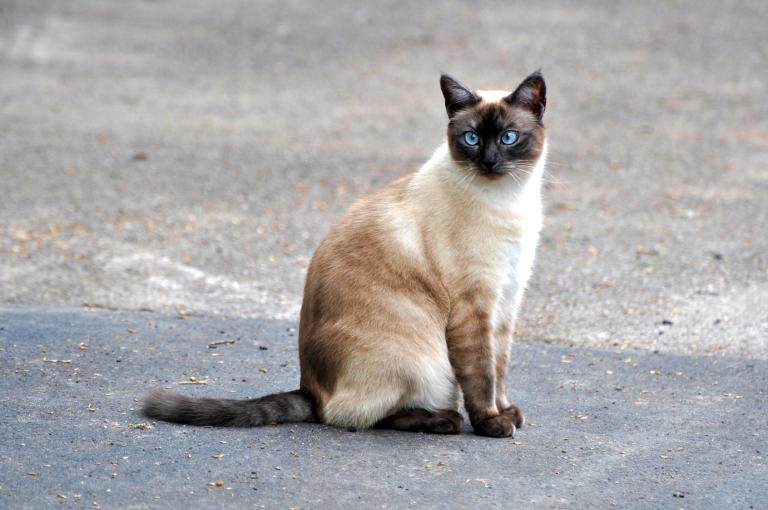

[284]


In [ ]:
import numpy as np
from google.colab import files
from PIL import Image
from io import BytesIO
import IPython.display

# wybranie sciezki do pliku (jakikolwiek obraz z google)
uploaded = files.upload()

# wyświetlenie obrazu
im = Image.open(BytesIO(uploaded['kot.jpg']))
# dla przeglądarek FireFox
# im = Image.open('kot.jpg')
IPython.display.display(im)

# przygotowanie obrazka
im_numpy = np.array(im.resize((224, 224)))  # rozmiar który przyjmuje ResNet
im_tf = tf.convert_to_tensor(im_numpy)[tf.newaxis]
im_tf = tf.image.convert_image_dtype(im_tf, tf.float32) * 2.0 - 1.0

# załadowanie pretrenowanego modelu i jego inferencja
model = tf.keras.applications.ResNet50V2(weights='imagenet')
prediction = model(im_tf)

# pobranie wyniku z sieci neuronowej
print(tf.argmax(prediction, -1).numpy())

Zgodnie z klasami zawartymi w zbiorze danych ImageNet, odpowiedź 284 oznacza "Kot syjamski".

Przykładowe klasy:

* 21: 'kite',
* 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
* 23: 'vulture',
* 243: 'bull mastiff',
* 244: 'Tibetan mastiff',
* 245: 'French bulldog',
* 282: 'tiger cat',
* 283: 'Persian cat',
* 284: 'Siamese cat, Siamese',
* 285: 'Egyptian cat',

Wszystkie obecne w ImageNet klasy: [link](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)

#### Zadanie 3

Spróbuj wykorzystać dowolną inną pretrenowaną sieć neuronową, zgodnie z powyższym schematem. Możesz spróbować załadować inny obraz.

Dostępne pretrenowane modele: [link](https://www.tensorflow.org/api_docs/python/tf/keras/applications)

**Uwaga:** zwróć uwagę na rozmiary danych, które przyjmują poszczególne sieci neuronowe. Pełna dokumentacja, wraz z rozmiarami znajduje się pod [linkiem](https://keras.io/applications/).

In [ ]:
model = tf.keras.applications.MobileNetV2(weights='imagenet')
prediction = model(im_tf)

print(f"predicted: {tf.argmax(prediction, -1).numpy()}")
